# 1. Import thư viện và cài các dependencies

In [ ]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [ ]:
!pip install opencv-python

In [ ]:
!pip install mediapipe 

In [16]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt 
import time
import mediapipe as mp

# 2. Tạo các keypoint và nối lại sử dụng MP holistic

In [17]:
mp_holistic = mp.solutions.holistic # khoi tao holistic model
mp_drawing = mp.solutions.drawing_utils # khoi tao ve cac duong noi

In [18]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Doi mau RGB
    image.flags.writeable = False                  # Image khong duoc phep ghi 
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image cho phep ghi anh
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # Doi mau ve BGR
    return image, results

In [19]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)  # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)      # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [20]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [22]:
cap = cv2.VideoCapture(0)
#Thiet lap mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic: # mo tep holistic 
  
  while cap.isOpened():
    
    # Read feed
    ret, frame = cap.read()
    
    #Make detections
    image, results = mediapipe_detection(frame, holistic)
    print(results)
    
    draw_styled_landmarks(image, results)
    # Show to screen
    cv2.imshow('OpenCV Feed', image)
    
    # Break gracefully
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [23]:
len(results.left_hand_landmarks.landmark)

21

In [24]:
results

mediapipe.python.solution_base.SolutionOutputs

In [25]:
draw_landmarks(frame, results)

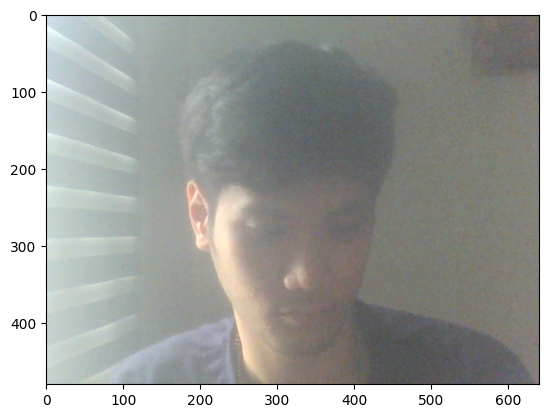

In [304]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Xac dinh gia tri cac diem node

In [27]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility]) # khai bao mang ma tran la gia tri cua cac diem node
    pose.append(test)                                      # chen test vao mang pose

In [28]:
# Trong trường hợp dữ liệu không đủ các node, gán xxx (pose.shape) giá trị các điểm node = 0 (xxx phụ thuộc vào số lượng các điểm node*3, thuộc left_hand, right_hand, face)
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132) # 
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(63)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    return np.concatenate([pose, face, lh, rh])

In [30]:
extract_keypoints(results)[:-10] #show kết quả hiển thị 10 giá trị cuối của mảng.

array([ 0.46765208,  0.58915365, -1.07579374, ...,  0.        ,
        0.        ,  0.        ])

# 4. Thiết lập Folders và tạo đường dẫn ghi dữ liệu

In [31]:
# Duong dan cho du lieu exports, 
DATA_PATH = os.path.join('MP_Data')

# Thong bao cac sign body can detech
actions = np.array(['k_cu_dong', 'gio_hai_tay', 'tay_truoc_nguc'])

# so luong du lieu
no_sequences = 30
sequences_length = 30

In [32]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Thu thập dữ liệu để train và test

In [305]:
cap = cv2.VideoCapture(0)
#Thiet lap mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic: # mo tep holistic 
  
  for action in actions:
        
        for sequence in range(no_sequences):
            
            for frame_num in range(sequences_length):
                
                # Read feed
                ret, frame = cap.read()
                
                image, results = mediapipe_detection(frame, holistic)
                
                draw_styled_landmarks(image, results)
                
                if frame_num == 0: # neu so luong frame thu thap bang 0
                    cv2.putText(image, 'STARTING COLLETION',(120,200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frame for {} video number {}'.format(action, sequence),(15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 4, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image,'Collecting frame for {} video number {}'.format(action, sequence),(15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 4, cv2.LINE_AA)
       
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                # Show to screen
                cv2.imshow('OpenCV Feed', image)
    
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

# Tien xu ly du lieu va tao nhan cho cac features

In [ ]:
!pip install -U scikit-learn scipy matplotlib

In [309]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [310]:
label_map = {label:num for num, label in enumerate(actions)}

In [ ]:
label_map

In [312]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequences_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [313]:
X = np.array(sequences)

In [314]:
y = to_categorical(labels).astype(int)

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# Build va Train model su dung mang LSTM

In [316]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard

In [317]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [318]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=False, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [319]:
res = [.7, 0.2, 0.1]

In [ ]:
actions[np.argmax(res)]

In [321]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [322]:
model.fit(X_train, y_train, epochs=200, callbacks=[tb_callback])

Epoch 1/200
3/3 [==============================] - 5s 143ms/step - loss: 2.7701 - categorical_accuracy: 0.3412
Epoch 2/200
3/3 [==============================] - 0s 140ms/step - loss: 4.1400 - categorical_accuracy: 0.3647
Epoch 3/200
3/3 [==============================] - 0s 139ms/step - loss: 3.2375 - categorical_accuracy: 0.3529
Epoch 4/200
3/3 [==============================] - 0s 138ms/step - loss: 2.7621 - categorical_accuracy: 0.3765
Epoch 5/200
3/3 [==============================] - 0s 141ms/step - loss: 3.1651 - categorical_accuracy: 0.2235
Epoch 6/200
3/3 [==============================] - 0s 139ms/step - loss: 4.2462 - categorical_accuracy: 0.2706
Epoch 7/200
3/3 [==============================] - 0s 136ms/step - loss: 2.3961 - categorical_accuracy: 0.2353
Epoch 8/200
3/3 [==============================] - 0s 146ms/step - loss: 1.4538 - categorical_accuracy: 0.3294
Epoch 9/200
3/3 [==============================] - 0s 137ms/step - loss: 1.1206 - categorical_accuracy: 0.2706
E

3/3 [==============================] - 0s 155ms/step - loss: 0.0552 - categorical_accuracy: 0.9882
Epoch 75/200
3/3 [==============================] - 1s 157ms/step - loss: 0.0692 - categorical_accuracy: 0.9882
Epoch 76/200
3/3 [==============================] - 0s 153ms/step - loss: 0.0585 - categorical_accuracy: 0.9882
Epoch 77/200
3/3 [==============================] - 0s 138ms/step - loss: 0.0334 - categorical_accuracy: 0.9882
Epoch 78/200
3/3 [==============================] - 0s 147ms/step - loss: 0.0371 - categorical_accuracy: 0.9765
Epoch 79/200
3/3 [==============================] - 0s 145ms/step - loss: 0.0710 - categorical_accuracy: 0.9882
Epoch 80/200
3/3 [==============================] - 0s 142ms/step - loss: 0.1350 - categorical_accuracy: 0.9882
Epoch 81/200
3/3 [==============================] - 0s 146ms/step - loss: 0.0700 - categorical_accuracy: 0.9882
Epoch 82/200
3/3 [==============================] - 0s 145ms/step - loss: 0.0471 - categorical_accuracy: 0.9882
Epoch

3/3 [==============================] - 0s 138ms/step - loss: 0.0412 - categorical_accuracy: 0.9882
Epoch 147/200
3/3 [==============================] - 0s 135ms/step - loss: 0.0208 - categorical_accuracy: 0.9882
Epoch 148/200
3/3 [==============================] - 0s 143ms/step - loss: 0.0284 - categorical_accuracy: 0.9882
Epoch 149/200
3/3 [==============================] - 0s 135ms/step - loss: 0.0367 - categorical_accuracy: 0.9882
Epoch 150/200
3/3 [==============================] - 0s 140ms/step - loss: 0.0344 - categorical_accuracy: 0.9882
Epoch 151/200
3/3 [==============================] - 0s 135ms/step - loss: 0.0246 - categorical_accuracy: 0.9882
Epoch 152/200
3/3 [==============================] - 0s 141ms/step - loss: 0.0190 - categorical_accuracy: 0.9882
Epoch 153/200
3/3 [==============================] - 0s 135ms/step - loss: 0.0251 - categorical_accuracy: 0.9882
Epoch 154/200
3/3 [==============================] - 0s 138ms/step - loss: 0.0170 - categorical_accuracy: 0.98

In [323]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_48 (LSTM)              (None, 30, 64)            442112    
                                                                 
 dropout_21 (Dropout)        (None, 30, 64)            0         
                                                                 
 lstm_49 (LSTM)              (None, 30, 64)            33024     
                                                                 
 dropout_22 (Dropout)        (None, 30, 64)            0         
                                                                 
 lstm_50 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_23 (Dropout)        (None, 32)                0         
                                                                 
 dense_48 (Dense)            (None, 128)             

# Du doan

In [324]:
res = model.predict(X_test)

1/1 [==============================] - 1s 557ms/step


In [325]:
actions[np.argmax(res[4])]

'thanks'

In [326]:
action[np.argmax(y_test[4])]

'o'

# Save model

In [327]:
model.save('action.h5')

In [328]:
model.load_weights('action.h5')

# Danh gia model

In [329]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [330]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 53ms/step


In [331]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [332]:
accuracy_score(ytrue, yhat)

1.0

# Phat hien theo thoi gian thuc

In [333]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [341]:
sequence.append('def')

In [342]:
sequence.reverse()

In [344]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res):
                if res[np.argmax(res)] > threshold: 
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 38ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 27ms/step
love
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
love
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
love
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
love
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
love
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
thanks
<class 'mediapipe.pytho

1/1 [==============================] - 0s 26ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 26ms/step
love
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
love
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
love
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
love
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
love
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
love
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
love
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
love
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
love
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 28ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
hello


In [273]:
np.unique(predictions[-10:])[0]==np.argmax(res)

True

In [338]:
cap.release()
cv2.destroyAllWindows()

In [339]:
res[np.argmax(res)] > threshold

True

In [340]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 [==============================] - 0s 32ms/step


array([[1.9607523e-05, 9.0894216e-01, 9.1038197e-02]], dtype=float32)